<H2>Part One: Data Exploration</H2>
The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

-Age of primary beneficiary

-Gender of primary beneficiary (only female, male recorded)

-Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

-Whether the beneficiary smokes

-The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

-Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

1.Read in the dataset, and display some summaries of the data.

2.Fix any concerns you have about the data.

3.Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

In [192]:
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, geom_line, aes, theme, labs, scale_color_manual,geom_hline,geom_boxplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [193]:


insurance_costs = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurance_costs.head

<bound method NDFrame.head of      age     sex     bmi smoker     region      charges
0     19  female  27.900    yes  southwest  16884.92400
1     33    male  22.705     no  northwest  21984.47061
2     32    male  28.880     no  northwest   3866.85520
3     31  female  25.740     no  southeast   3756.62160
4     60  female  25.840     no  northwest  28923.13692
..   ...     ...     ...    ...        ...          ...
426   23  female  33.400     no  southwest  10795.93733
427   18  female  31.920     no  northeast   2205.98080
428   18  female  36.850     no  southeast   1629.83350
429   21  female  25.800     no  southwest   2007.94500
430   61  female  29.070    yes  northwest  29141.36030

[431 rows x 6 columns]>

In [194]:
insurance_costs.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'charges'], dtype='object')

In [195]:
insurance_costs.isna().sum() #looking for any null values

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

No null values in the data set

In [196]:
insurance_costs.describe()

age         bmi       charges
count  431.000000  431.000000    431.000000
mean    37.960557   30.768898  12297.098118
std     16.363909    6.111362  11876.527128
min     18.000000   15.960000   1131.506600
25%     22.000000   26.357500   2710.444575
50%     34.000000   30.590000   9866.304850
75%     55.000000   35.272500  14510.872600
max     64.000000   49.060000  55135.402090

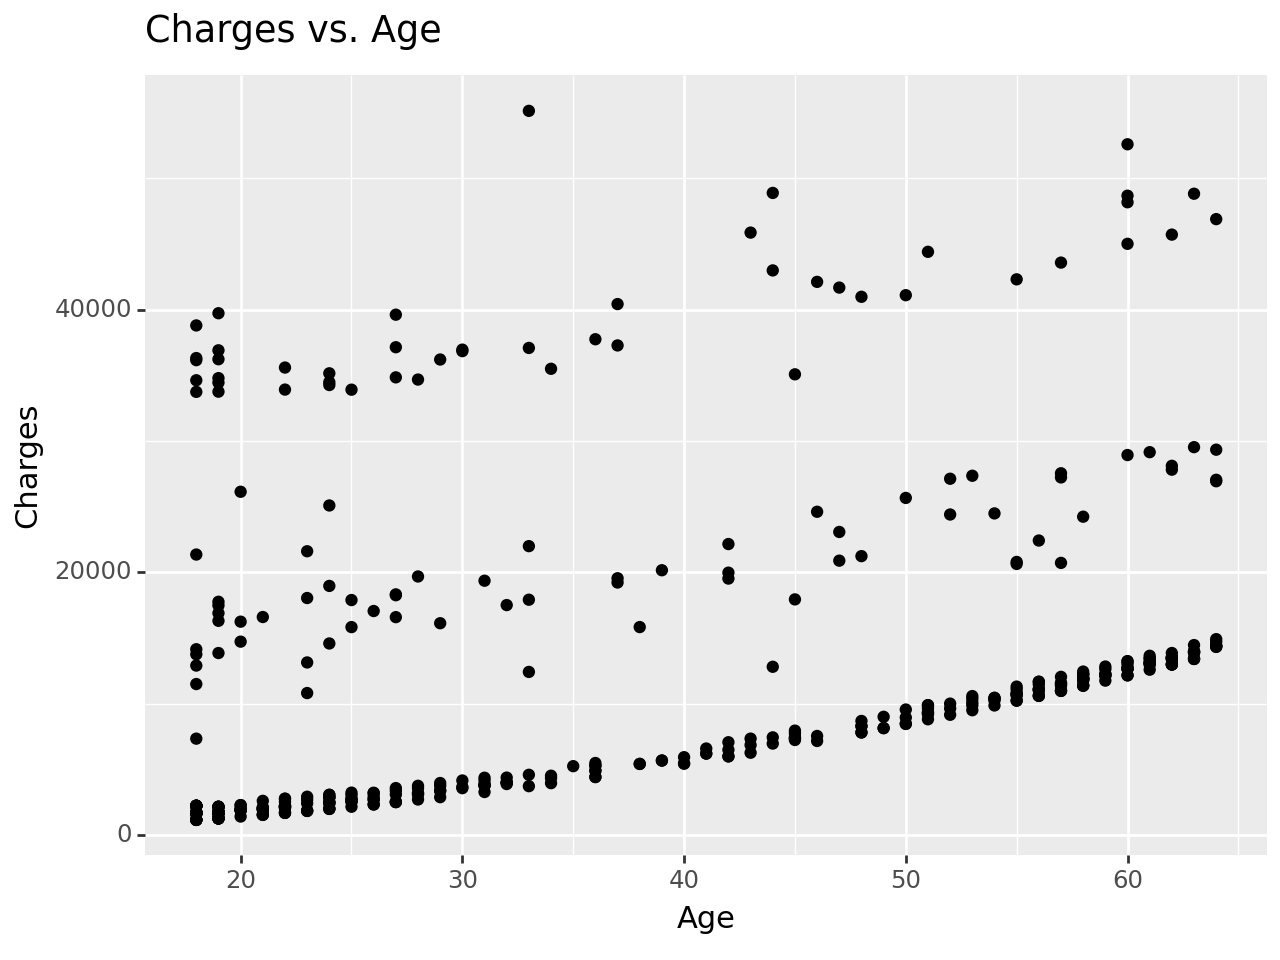

In [197]:
# Charges vs Age
plot = (
    ggplot(insurance_costs, aes(x='age', y='charges')) +
    geom_point() +
    labs(title="Charges vs. Age", x="Age", y="Charges")
)

print(plot)

Insurance charges increase as people age, but there are instances of higher charges at younger ages as well, probably due to BMI and smokers.

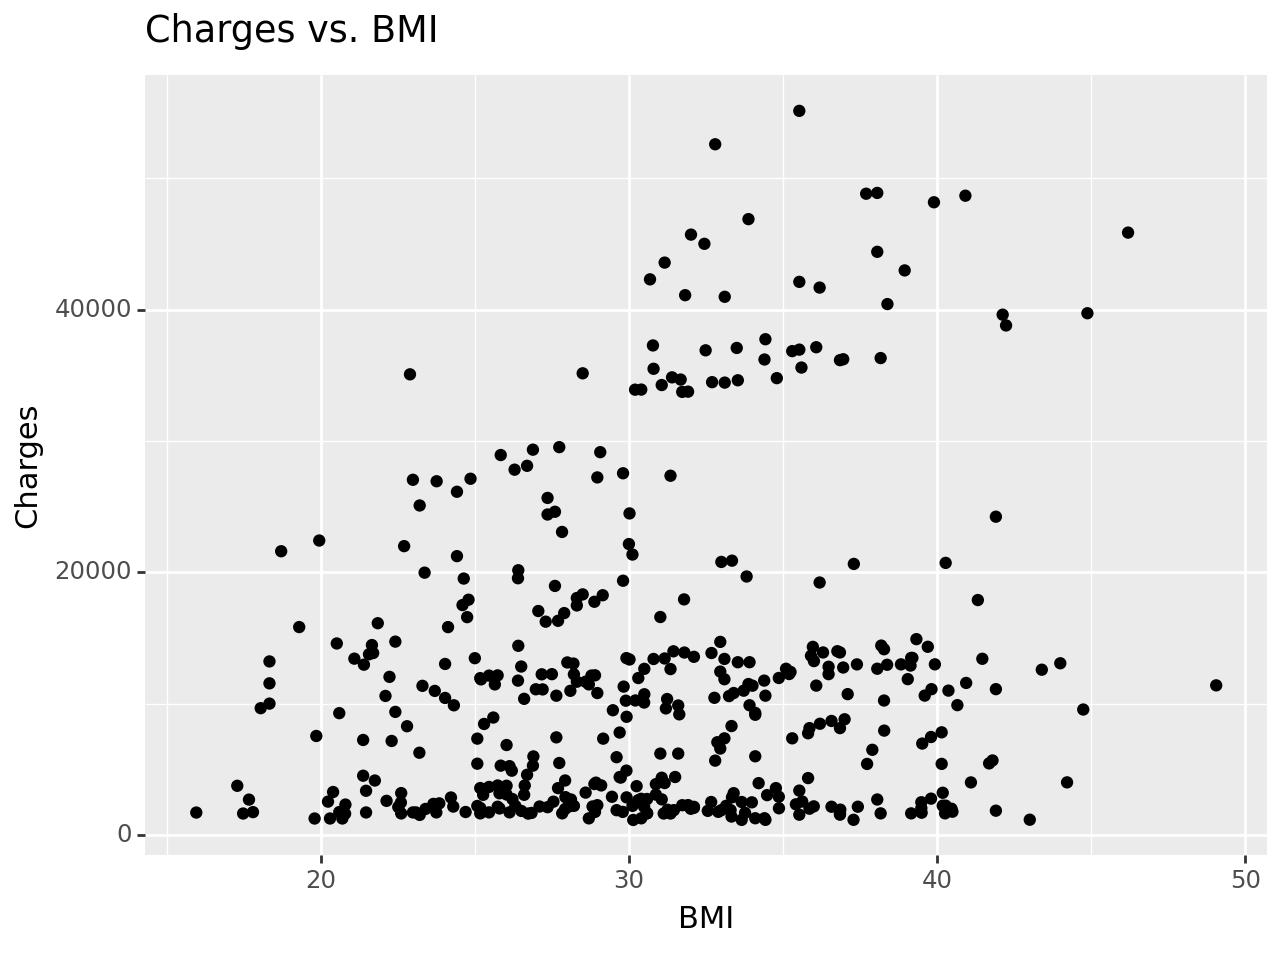

In [198]:
# Charges vs BMI
plot = (
    ggplot(insurance_costs, aes(x='bmi', y='charges')) +
    geom_point() +
    labs(title="Charges vs. BMI", x="BMI", y="Charges")
)

print(plot)

The plot shows that there are not as many healthy BMI data points between 18.5 and 24.9 which is considered normal as there are overweight and obese levels of BMI. There is a correlation between BMI and insurance charges positively, especially when BMI is 30+

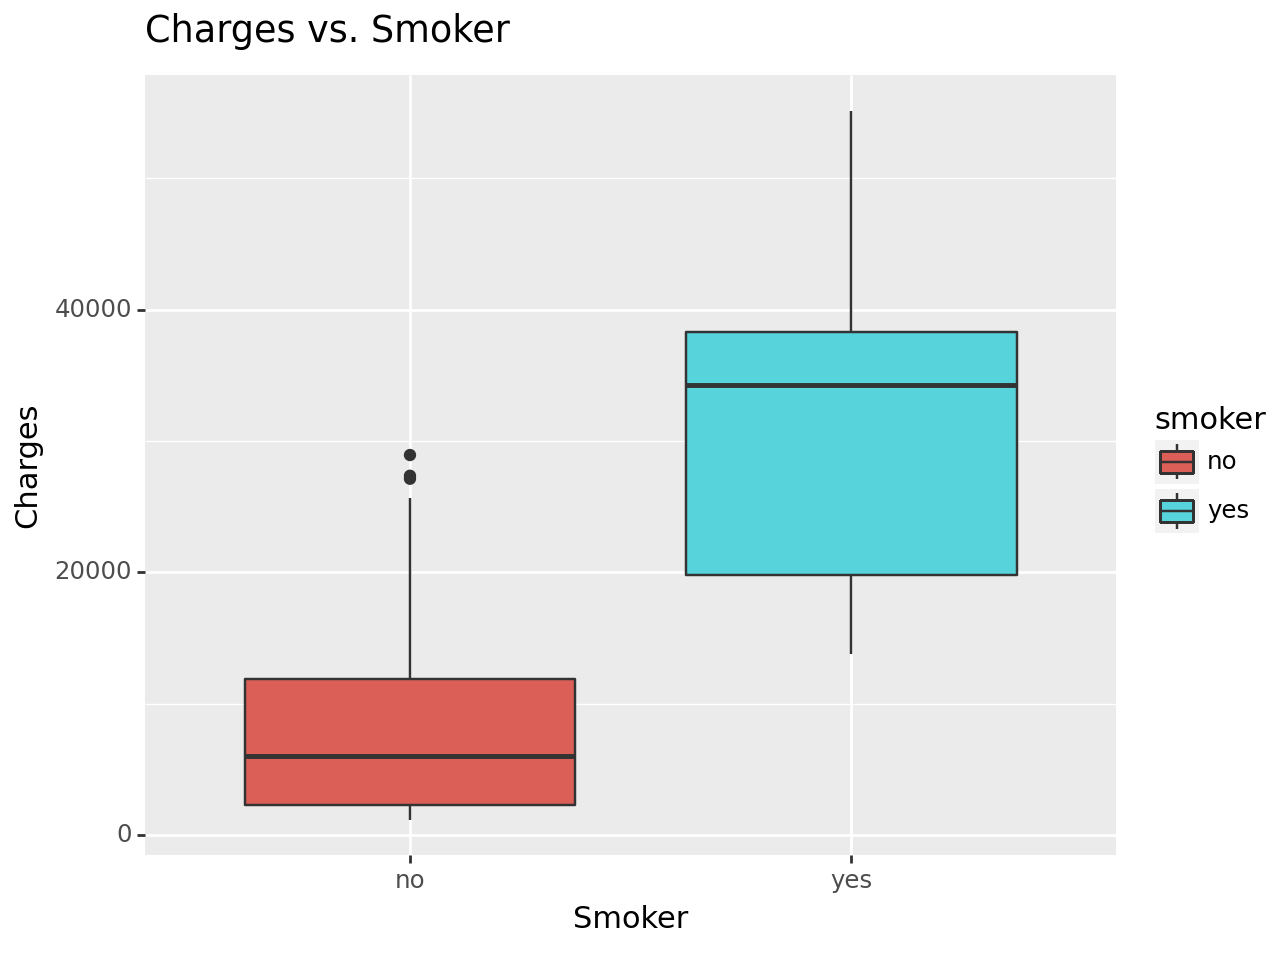

In [199]:
# Plot3: Boxplot of charges vs smoker
plot = (
    ggplot(insurance_costs, aes(x='smoker', y='charges')) +
    geom_boxplot(aes(fill='smoker')) +
    labs(title="Charges vs. Smoker", x="Smoker", y="Charges")
)

print(plot)

Insurance charges are significantly higher for smokers than they are for non-smokers as presented by this boxplot which is due to not being considered healthy in insurance companies.


<H2>Part Two: Simple Linear Models</H2>
Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

Make a model that also incorporates the variable sex. Report your results.

Now make a model that does not include sex, but does include smoker. Report your results.

Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [200]:
X = insurance_costs[['age']]
y = insurance_costs['charges']


# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

lr_1 = LinearRegression()

lr_1.fit(X_train, y_train)

y_pred_test_1 = lr_1.predict(X_test)

mse_test_1 = mean_squared_error(y_test, y_pred_test_1)
r2_test_1 = r2_score(y_test, y_pred_test_1)

print(f"Test MSE for Model 1: {mse_test_1}")
print(f"Test R-squared for Model 1: {r2_test_1}")

intercept = lr_1.intercept_
co_eff = lr_1.coef_[0]

print(f"y-int: {lr_1.intercept_}")
print(f"Coeff [age]: {lr_1.coef_[0]}")


Test MSE for Model 1: 117772680.94480152
Test R-squared for Model 1: 0.13396013943563212
y-int: 4166.493077417836
Coeff [age]: 215.222245776387


The R-squared value of 0.13 shows that only 13% of the variability is explained by the model. So ony using age as a predictor variable is not enough to estimate a reliable model.

The y-intercept value indicates that at age 0, there would be an estimated insurance charge of 4166.49 dollars.

So with every 1 unit of change in age, there is a $215.22 change in insurance costs if everything else is constant.

**Make a model that also incorporates the variable sex. Report your results.**

In [201]:
# Creating dummy variables and creating a reference variable for each
ins_costs_dummies = pd.get_dummies(insurance_costs, drop_first=True)
ins_costs_dummies.head()

age     bmi      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900  16884.92400         0           1                 0   
1   33  22.705  21984.47061         1           0                 1   
2   32  28.880   3866.85520         1           0                 1   
3   31  25.740   3756.62160         0           0                 0   
4   60  25.840  28923.13692         0           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 0                 0  
2                 0                 0  
3                 1                 0  
4                 0                 0

In [202]:
X = ins_costs_dummies[['age', 'sex_male']]
y = ins_costs_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

y_pred_test_2 = lr_2.predict(X_test)

mse_test_2 = mean_squared_error(y_test, y_pred_test_2)
r2_test_2 = r2_score(y_test, y_pred_test_2)

print(f"Test MSE for Model 2: {mse_test_2}")
print(f"Test R-squared for Model 2: {r2_test_2}")

intercept = lr_2.intercept_
co_eff = lr_2.coef_[0]

print(f"y-int: {lr_2.intercept_}")
print(f"Coeff [age]: {lr_2.coef_[0]}")
print(f"Coeff [sex_male]: {lr_2.coef_[1]}")

Test MSE for Model 2: 117598969.62446345
Test R-squared for Model 2: 0.13523752334535688
y-int: 3902.605269802076
Coeff [age]: 214.72013744557012
Coeff [sex_male]: 563.9442774950797


This model that takes the age and sex variable has an r-squared value of 0.14, which indicates that only 14% of the variability is explained by the model. This performed better than just age alone, and this could mean that incorporating other variables such as bmi, smoker could better fit the model than age and sex.

The y-intercept value indicates that at age 0, there is an estimated charge of $3902.61.

The coefficient for age is 214.72, which indicates that with 1 unit change in age, holding all else constant, there would be a $214.72 change in insurance charges.

The coefficient for sex_male is 563.94, which would indicate that being male is associated with an increase in insurance charges by $563.94, holding all else constant.


**Now make a model that does not include sex, but does include smoker. Report your results.**

In [203]:
X = ins_costs_dummies[['age', 'smoker_yes']]
y = ins_costs_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

lr_3 = LinearRegression()

lr_3.fit(X_train, y_train)

y_pred_test_3 = lr_3.predict(X_test)

mse_test_3 = mean_squared_error(y_test, y_pred_test_3)
r2_test_3 = r2_score(y_test, y_pred_test_3)

print(f"Test MSE for Model 3: {mse_test_3}")
print(f"Test R-squared for Model 3: {r2_test_3}")

intercept = lr_3.intercept_
co_eff = lr_3.coef_[0]

print(f"y-int: {lr_3.intercept_}")
print(f"Coeff [Age]: {lr_3.coef_[0]}")
print(f"Coeff [Smoker_Yes]: {lr_3.coef_[1]}")

Test MSE for Model 3: 30550647.905666158
Test R-squared for Model 3: 0.7753462123803163
y-int: -1624.2427076469266
Coeff [Age]: 238.96341348584446
Coeff [Smoker_Yes]: 24321.2941286013


This model with age and smoker predicting charges had an R2 score of 0.78, which indicates that 78% of the variability is represented by the model.So we can determine that smoking along with age has a considerable effect on insurance charges, more than age and sex models.

The y-intercept is -1624.24 which indicates that at age 0 and non-smoking, there is a charge of -$1624.24, but this does not have meaning as someone with age 0 would not have hospital charges aside from being born.

The coefficient for age is 238.96 which indicates that for every 1 unit change in age, when all other variables constant, there is a $238.96 change in insurance charges.

The coefficient for being a smoker is 24321.29 and this indicates that being a smoker results in a increase in insurance charge by $224321.29.

**Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.**

In [204]:
print("Comparison of Model 2 and 3 based on Test Data:")
print(f"Test MSE for Model 2: {mse_test_2} vs Model 3: {mse_test_3}")
print(f"Test R-squared for Model 2: {r2_test_2} vs Model 3: {r2_test_3}")
print()
print("Model 1 results:")
print(f"Test MSE for Model 1: {mse_test_1}")
print(f"Test R-squared for Model 1: {r2_test_1}")

Comparison of Model 2 and 3 based on Test Data:
Test MSE for Model 2: 117598969.62446345 vs Model 3: 30550647.905666158
Test R-squared for Model 2: 0.13523752334535688 vs Model 3: 0.7753462123803163

Model 1 results:
Test MSE for Model 1: 117772680.94480152
Test R-squared for Model 1: 0.13396013943563212


Between Model 3 and Model 2, Model 3's R-squared value (0.78) is considerably higher than Model 2 (0.14) and also Model 1 (0.13). When comparing Model 1 to Model 2, only the sex variable was added and the model got better by very small margin.

Between Model 2 (117,598,969.62) and Model 3 (30,550,647.91), removing the sex variable and adding in the smoker variable improved the MSE score.

Model 3 fits the data better than the Model 2, and Model 1.

<h3> Part Three: Multiple Linear Models</h3>

Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [205]:
X = ins_costs_dummies[['age', 'bmi']]
y = ins_costs_dummies['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# Model 4: Age and BMI
lr_4 = LinearRegression()
lr_4.fit(X_train, y_train)

y_pred_4_test = lr_4.predict(X_test)

mse_test_4 = mean_squared_error(y_test, y_pred_4_test)
r2_test_4 = r2_score(y_test, y_pred_4_test)

print(f"Test MSE for Model 4: {mse_test_4}")
print(f"Test R-squared for Model 4: {r2_test_4}")

#Model 1
print(f"Test MSE for Model 1: {mse_test_1}")
print(f"Test R-squared for Model 1: {r2_test_1}")

Test MSE for Model 4: 114939057.41373546
Test R-squared for Model 4: 0.1547971528079144
Test MSE for Model 1: 117772680.94480152
Test R-squared for Model 1: 0.13396013943563212


Model 4 with predictor variables age and bmi, without an interaction term between them, had a MSE of 114939057.41, which was slightly better at explaining the variability in the model than P2_Q1's Model 1 at 117772680.94. The R2 score tells the same story; Model 4, 0.16, was slightly better than Model 1, 0.13.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [206]:
# Model 5: Age and Age Squared
X_train_5 = X_train.copy()
X_train_5['age_squared'] = X_train_5['age'] ** 2
X_test_5 = X_test.copy()
X_test_5['age_squared'] = X_test_5['age'] ** 2

lr_5 = LinearRegression()
lr_5.fit(X_train_5, y_train)

y_test_pred5 = lr_5.predict(X_test_5)

mse_test_5 = mean_squared_error(y_test, y_test_pred5)
r2_test_5 = r2_score(y_test, y_test_pred5)

print(f"Test MSE for Model 5: {mse_test_5}")
print(f"Test R-squared for Model 5: {r2_test_5}")

#Model 1
print(f"Test MSE for Model 1: {mse_test_1}")
print(f"Test R-squared for Model 1: {r2_test_1}")

Test MSE for Model 5: 115043170.09868172
Test R-squared for Model 5: 0.15403156154829034
Test MSE for Model 1: 117772680.94480152
Test R-squared for Model 1: 0.13396013943563212


Model 5 with predictor variables age and age^2 had a MSE of 115043170.1, which was only slightly better at explaining the variability than Model 1 at 117772680.94, and ever so slightly worse than Model 4 at 114939057.41. The R2 score tells the same story; Model 5's R2 of 0.15 was better than Model 1's R2 of 0.13 from Part Two Q1, but was the same as Model 4's R2 score above.

Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [207]:
from sklearn.preprocessing import PolynomialFeatures

# Defining the response and predictor variables
poly_d_4 = PolynomialFeatures(degree=(1,4), include_bias=False)

X_train_polyd4 = poly_d_4.fit_transform(X_train[['age']])
X_test_polyd4 = poly_d_4.transform(X_test[['age']])

lr_6 = LinearRegression()
lr_6.fit(X_train_polyd4, y_train)

y_test_pred6 = lr_6.predict(X_test_polyd4)

mse_test_6 = mean_squared_error(y_test, y_test_pred6)
r2_test_6 = r2_score(y_test, y_test_pred6)

print(f"Test MSE for Model 6: {mse_test_6}")
print(f"Test R-squared for Model 6: {r2_test_6}")

#Model 1
print(f"Test MSE for Model 1: {mse_test_1}")
print(f"Test R-squared for Model 1: {r2_test_1}")

Test MSE for Model 6: 122880724.26616247
Test R-squared for Model 6: 0.09639821004505011
Test MSE for Model 1: 117772680.94480152
Test R-squared for Model 1: 0.13396013943563212


Model 6 with predictor variables age, age^2, age^3, and age^4 had a MSE of 122880724.27, and R2 score of 0.10, which was slightly worse at explaining the variability than P2 Q1's Model 1 at MSE of 117772680.94 and R2 of 0.13.

Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [208]:
poly_d_12 = PolynomialFeatures(degree=(1,12), include_bias=False)

X_train_polyd12 = poly_d_12.fit_transform(X_train[['age']])
X_test_polyd12 = poly_d_12.transform(X_test[['age']])

lr7 = LinearRegression()
lr7.fit(X_train_polyd12, y_train)

y_test_pred7 = lr7.predict(X_test_polyd12)

mse_test_7 = mean_squared_error(y_test, y_test_pred7)
r2_test_7 = r2_score(y_test, y_test_pred7)

print(f"Test MSE for Model 7: {mse_test_7}")
print(f"Test R-squared for Model 7: {r2_test_7}")

#Model 1
print(f"Test MSE for Model 1: {mse_test_1}")
print(f"Test R-squared for Model 1: {r2_test_1}")

Test MSE for Model 7: 121939671.28759316
Test R-squared for Model 7: 0.10331823074769364
Test MSE for Model 1: 117772680.94480152
Test R-squared for Model 1: 0.13396013943563212


Model 7 fitting a polynomial model of degree 12 had a MSE of 121939671.29, and R2 score of 0.10, which was slightly worse at explaining the variability than P2 Q1's Model 1 with an MSE of 117772680.94 and an R2 of 0.13.So adding more polynomial variables did not help with explaining the variability well

According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?



In [209]:
print(f"Test MSE for Model 4: {mse_test_4}")
print(f"Test R-squared for Model 4: {r2_test_4}")
print(f"Test MSE for Model 5: {mse_test_5}")
print(f"Test R-squared for Model 5: {r2_test_5}")
print(f"Test MSE for Model 6: {mse_test_6}")
print(f"Test R-squared for Model 6: {r2_test_6}")
print(f"Test MSE for Model 7: {mse_test_7}")
print(f"Test R-squared for Model 7: {r2_test_7}")
print(f"Test MSE for Model 1: {mse_test_1}")
print(f"Test R-squared for Model 1: {r2_test_1}")

Test MSE for Model 4: 114939057.41373546
Test R-squared for Model 4: 0.1547971528079144
Test MSE for Model 5: 115043170.09868172
Test R-squared for Model 5: 0.15403156154829034
Test MSE for Model 6: 122880724.26616247
Test R-squared for Model 6: 0.09639821004505011
Test MSE for Model 7: 121939671.28759316
Test R-squared for Model 7: 0.10331823074769364
Test MSE for Model 1: 117772680.94480152
Test R-squared for Model 1: 0.13396013943563212


According to the MSE and R2 scores from Model 1, 4, 5, 6, and 7, the best model would be Model 4, using the age and BMI variables to predict insurance charges. It had the highest R2 score, 0.16, and the lowest MSE at 114939057.41. It should be noted that Model 5, with age and age^2 variables, was not very far behind, and should be considered for model selection as well.

Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.



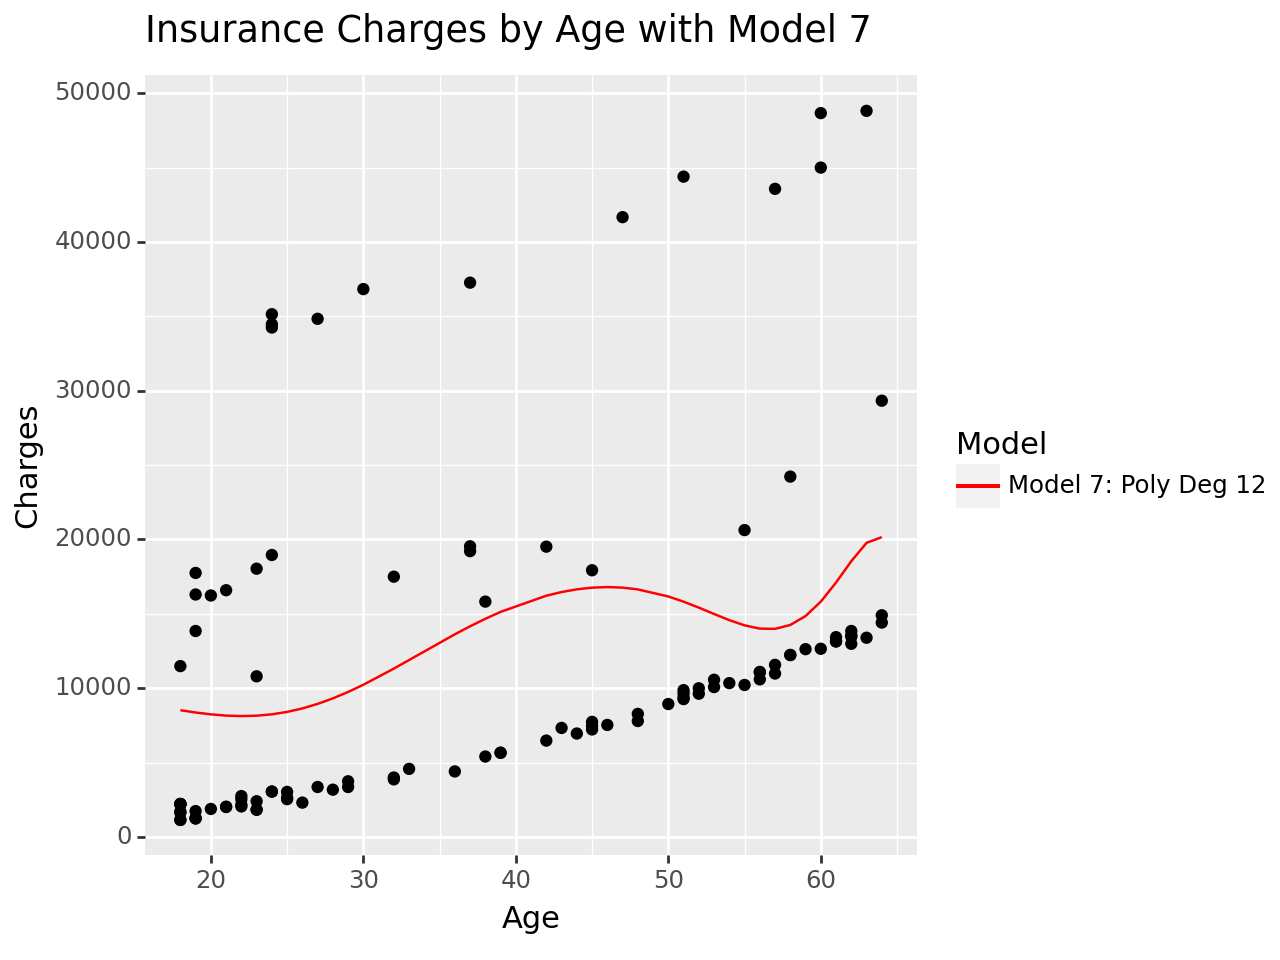

In [210]:

# Converting X_test to a dataframe and variables for original data
test_data_with_pred = X_test.copy()
test_data_with_pred['pred'] = y_test_pred7
test_data_with_pred['charges'] = y_test

# Plotting
plot = (
    ggplot(test_data_with_pred)
    + geom_point(aes(x='age', y='charges'), color='black')
    + geom_line(aes(x='age', y='pred', color='"Model 7: Poly Deg 12"'))
    + scale_color_manual(values={'Model 7: Poly Deg 12': 'red'})
    + labs(x='Age', y='Charges', title="Insurance Charges by Age with Model 7", color='Model')
)
print(plot)

<H2>Part Four: New data</H2>

Great news! We’ve managed to collect data about the insurance costs for a few more individuals.
You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

In [211]:
ins_costs_old = pd.read_csv('https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1')
ins_costs_new = pd.read_csv('https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1')

In [212]:
ins_costs_new.isna().sum() #checking null values

age        0
sex        0
bmi        0
smoker     0
region     0
charges    0
dtype: int64

In [213]:
# Model 1: only age as a predictor
lr = LinearRegression()

X_old_age = ins_costs_old[['age']]
y_old = ins_costs_old['charges']

lr.fit(X_old_age, y_old)

X_new_age = ins_costs_new[['age']]
y_new = ins_costs_new['charges']
pred_age = lr.predict(X_new_age)

# Calculating MSE and R-sqaured for the predictions
mse_age = mean_squared_error(y_new, pred_age)
r2_age = r2_score(y_new, pred_age)

print(f'MSE for model with only age as a predictor: {mse_age}')
print(f"R-squared for new data with only age as a predictor: {r2_age}")


MSE for model with only age as a predictor: 136077136.50195494
R-squared for new data with only age as a predictor: 0.12236515675533055


In [214]:
# Model 2: age and bmi as a predictor
X_old_age_bmi = ins_costs_old[['age', 'bmi']]
y_old = ins_costs_old['charges']

lr.fit(X_old_age_bmi, y_old)

X_new_age_bmi = ins_costs_new[['age', 'bmi']]
y_new = ins_costs_new['charges']
pred_age_bmi = lr.predict(X_new_age_bmi)

# Calculating MSE and R-sqaured for the predictions
mse_age_bmi = mean_squared_error(y_new, pred_age_bmi)
r2_age_bmi = r2_score(y_new, pred_age_bmi)

print(f'MSE for model with age and bmi as predictors: {mse_age_bmi}')
print(f"R-squared for new data with only age as a predictor: {r2_age_bmi}")


MSE for model with age and bmi as predictors: 132636406.1108129
R-squared for new data with only age as a predictor: 0.14455628272331222


In [215]:
# Model 3: age, bmi, and smoker as predictors (no interaction terms)
ins_costs_old_dummies = pd.get_dummies(ins_costs_old, columns=['smoker'], drop_first=True) # dummy variables for 'smoker'
ins_costs_new_dummies = pd.get_dummies(ins_costs_new, columns=['smoker'], drop_first=True)

X_old_age_bmi_smoker = ins_costs_old_dummies[['age', 'bmi', 'smoker_yes']]
y_old = ins_costs_old_dummies['charges']

lr.fit(X_old_age_bmi_smoker, y_old)

X_new_age_bmi_smoker = ins_costs_new_dummies[['age', 'bmi', 'smoker_yes']]
y_new = ins_costs_new_dummies['charges']

pred_age_bmi_smoker = lr.predict(X_new_age_bmi_smoker)

# Calculating MSE and R-sqaured for the predictions
mse_age_bmi_smoker = mean_squared_error(y_new, pred_age_bmi_smoker)
r2_age_bmi_smoker = r2_score(y_new, pred_age_bmi_smoker)

print(f'MSE for model with age, bmi, and smoker as predictors: {mse_age_bmi_smoker}')
print(f"R-squared for new data with age, bmi, and smoker as predictors: {r2_age_bmi_smoker}")

MSE for model with age, bmi, and smoker as predictors: 35377541.24141632
R-squared for new data with age, bmi, and smoker as predictors: 0.7718311565047801


In [216]:
# Model 4: age, and bmi, with both quantitative variables having an interaction
# term with smoker (i.e. the formula ~ (age + bmi):smoker)

interaction = PolynomialFeatures(degree=(1,2), interaction_only=True, include_bias=False)
X_old_inter = interaction.fit_transform(ins_costs_old_dummies[['age', 'bmi', 'smoker_yes']])
X_new_inter = interaction.transform(ins_costs_new_dummies[['age', 'bmi', 'smoker_yes']])

lr.fit(X_old_inter, y_old)

pred_inter = lr.predict(X_new_inter)

# Calculating MSE and R-sqaured for the predictions
mse_int = mean_squared_error(y_new, pred_inter)
r2_int = r2_score(y_new, pred_inter)

print(f'MSE for model with interaction terms: {mse_int}')
print(f"R-squared for new data with interaction term with smoker: {r2_int}")

MSE for model with interaction terms: 21785261.846900098
R-squared for new data with interaction term with smoker: 0.8594950969902753


In [217]:
# Model 5: age, bmi, and smokeras predictors, with both quantitative variables
# having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_old_int_full = interaction.fit_transform(ins_costs_old_dummies[['age', 'bmi', 'smoker_yes']])

X_old_full = np.hstack([ins_costs_old_dummies[['age', 'bmi']].values, X_old_int_full[:, -2:]])

lr.fit(X_old_full, y_old)

X_new_int_full = interaction.transform(ins_costs_new_dummies[['age', 'bmi', 'smoker_yes']])
X_new_full = np.hstack([ins_costs_new_dummies[['age', 'bmi']].values, X_new_int_full[:, -2:]])

pred_full_int = lr.predict(X_new_full)

# Calculating MSE and R-sqaured for the predictions
mse_full_int = mean_squared_error(y_new, pred_full_int)
r2_full_int = r2_score(y_new, pred_full_int)

print(f'MSE for model with full interaction terms: {mse_full_int}')
print(f"R-squared for new data with full interaction term with smoker: {r2_full_int}")

MSE for model with full interaction terms: 24795908.41264337
R-squared for new data with full interaction term with smoker: 0.8400778135676981


In [218]:
print(f'MSE for model with only age as a predictor: {mse_age}')
print(f'MSE for model with age and BMI as predictors: {mse_age_bmi}')
print(f'MSE for model with age, BMI, and smoker as predictors: {mse_age_bmi_smoker}')
print(f'MSE for model with age, BMI, and interaction term with smoker: {mse_int}')
print(f'MSE for model with age, BMI, and full interaction term with smoker: {mse_full_int}')

MSE for model with only age as a predictor: 136077136.50195494
MSE for model with age and BMI as predictors: 132636406.1108129
MSE for model with age, BMI, and smoker as predictors: 35377541.24141632
MSE for model with age, BMI, and interaction term with smoker: 21785261.846900098
MSE for model with age, BMI, and full interaction term with smoker: 24795908.41264337


The model would be Model with age, BMI, and interaction term with smoker but Model with age, BMI, and full interaction term with smoker is very close in terms of R-sqaured although it has higher MSE. Hence Model 4 is the best fit.

In [219]:
# Calculating the residuals
residuals_M4 = y_new - pred_inter # age, BMI, and interaction terms

# Creating a dataframe for plot
plot_data = pd.DataFrame({
    'Predicted': pred_inter,
    'Residuals': residuals_M4
})
plot_data

Predicted     Residuals
0     3585.278953  -1758.435953
1    12176.735952  -1574.350952
2     2290.870674  -1153.859674
3    13823.843606    627.991544
4    13876.152205   -106.054305
..            ...           ...
138  33016.820891   1811.833109
139  32670.273122  29922.599968
140  28370.044385   9459.679815
141   3826.897256  -1362.278456
142   2318.025504  -1154.562804

[143 rows x 2 columns]

The best model is the model with Age + BMI + interaction terms with an MSE of 21785261.85

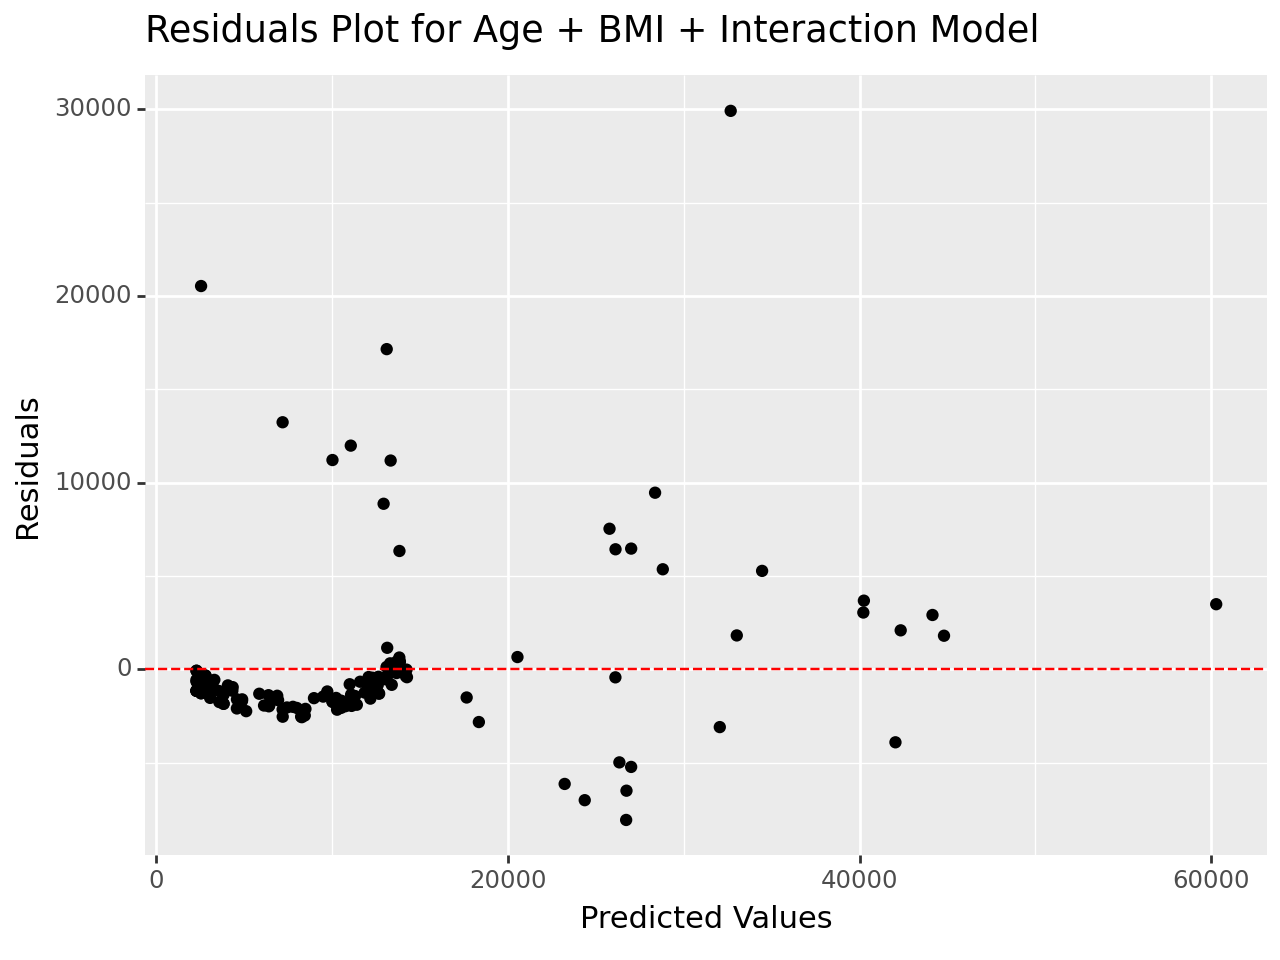

In [220]:
# Residuals plot
residuals_plotM4 = (
    ggplot(plot_data, aes(x='Predicted', y='Residuals')) +
    geom_point() +
    geom_hline(yintercept=0, color='red', linetype='dashed') +
    labs(x='Predicted Values', y='Residuals', title='Residuals Plot for Age + BMI + Interaction Model')
)
print(residuals_plotM4)

<H2>Part Five: Full Exploration</H2>

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

As including Age, BMI and Smoker variables resulted in a best fit. I am considering 2 more models where the models will be Model A2:Age^2, BMI and Smoker and Model A3:Age^3, BMI and Smoker

In [221]:
#Model A2 :Age^2, BMI and Smoker
X = ins_costs_old[['age', 'bmi', 'smoker']]
y = ins_costs_old['charges']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['age']])
X_poly_df = pd.DataFrame(X_poly, columns=['age', 'age_squared'])
X = pd.concat([X_poly_df, X[['bmi', 'smoker']]], axis=1)
ct = ColumnTransformer(
    transformers=[
        ('smoker_encoder', OneHotEncoder(drop='first'), ['smoker'])
    ],
    remainder='passthrough'
)
model2 = Pipeline([
    ('preprocessor', ct),
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False)),
    ('regressor', LinearRegression())
])

model2.fit(X, y)
X_new = ins_costs_new[['age', 'bmi', 'smoker']]
X_new_poly = poly.transform(X_new[['age']])
X_new_poly_df = pd.DataFrame(X_new_poly, columns=['age', 'age_squared'])
X_new = pd.concat([X_new_poly_df, X_new[['bmi', 'smoker']]], axis=1)
y_new_2 = ins_costs_new['charges']
y_pred_new_2 = model2.predict(X_new)

mse_new = mean_squared_error(y_new_2, y_pred_new_2)
r2_new = r2_score(y_new_2, y_pred_new_2)
print(f"Model A2 R-squared: {r2_new}")
print(f"Model A2 Mean Squared Error: {mse_new}")

Model A2 R-squared: 0.861382341204594
Model A2 Mean Squared Error: 21492644.945302486


In [222]:
#Model A3 :Age^3, BMI and Smoker
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X[['age']])
X_poly_df = pd.DataFrame(X_poly, columns=['age', 'age_squared', 'age_cubed'])
X = pd.concat([X_poly_df, X[['bmi', 'smoker']]], axis=1)

model2.fit(X, y)
X_new_poly = poly.transform(X_new[['age']])
X_new_poly_df = pd.DataFrame(X_new_poly, columns=['age', 'age_squared', 'age_cubed'])
X_new = pd.concat([X_new_poly_df, X_new[['bmi', 'smoker']]], axis=1)
y_pred_new = model2.predict(X_new)
mse_new = mean_squared_error(y_new, y_pred_new)
r2_new = r2_score(y_new, y_pred_new)
print(f"Model A3 R-squared: {r2_new}")
print(f"Model A3 Mean Squared Error: {mse_new}")

Model A3 R-squared: 0.8592290640691798
Model A3 Mean Squared Error: 21826510.207076967


Hence, the best fit was the Model A2 with the highest R-squared and lower MSE

In [223]:
residuals = y_new_2 - y_pred_new_2

plot_data = pd.DataFrame({
    'Predicted': y_pred_new_2,
    'Residuals': residuals
})
plot_data

Predicted     Residuals
0     3448.359455  -1621.516455
1    12291.964955  -1689.579955
2     2849.991768  -1712.980768
3    13713.810070    738.025080
4    13881.849413   -111.751513
..            ...           ...
138  33347.389952   1481.264048
139  32684.080458  29908.792632
140  28370.254543   9459.469657
141   3631.524064  -1166.905264
142   3142.250219  -1978.787519

[143 rows x 2 columns]

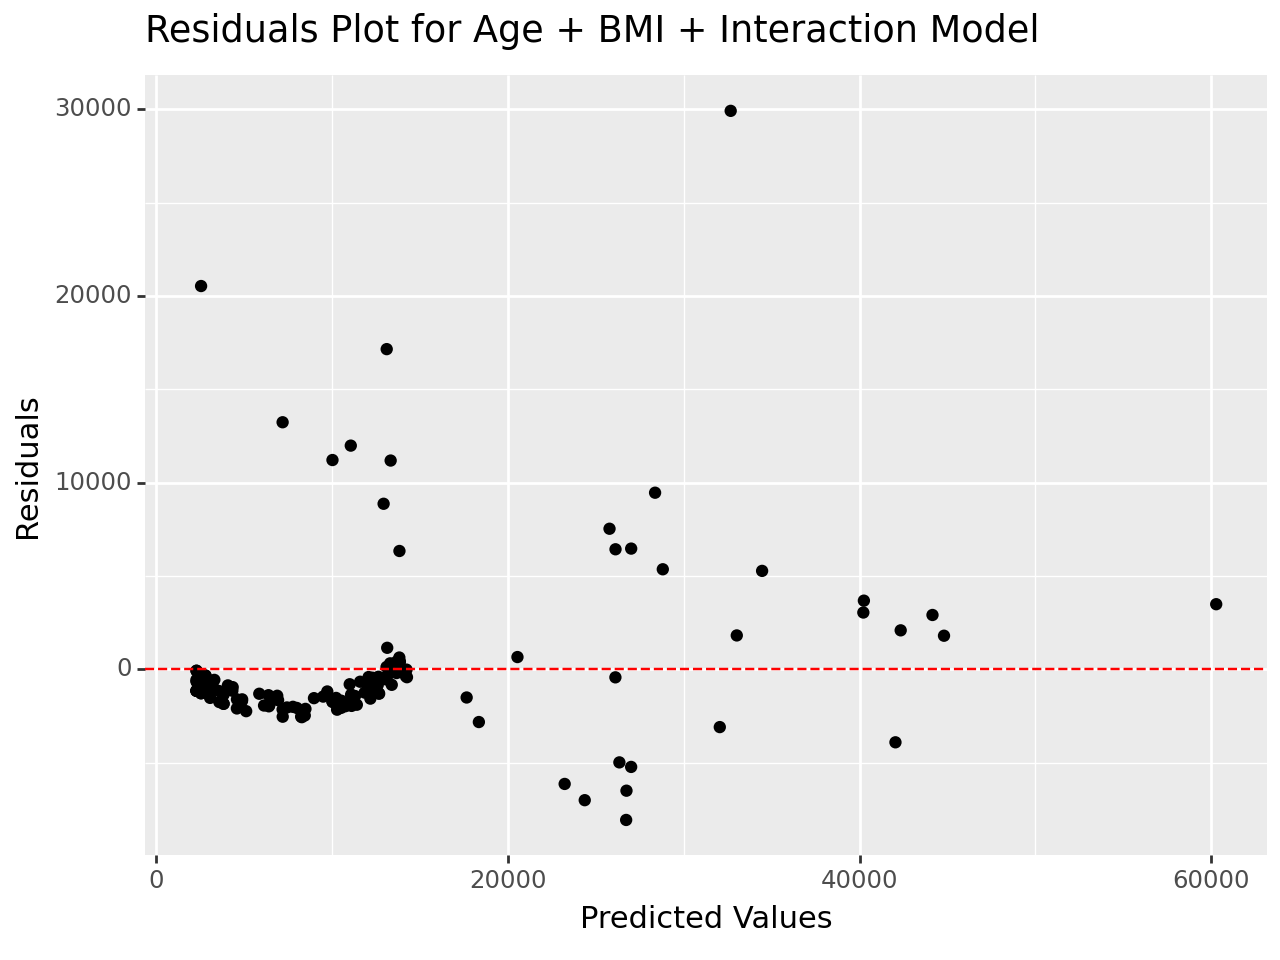

In [224]:
residuals_best = (
    ggplot(plot_data, aes(x='Predicted', y='Residuals')) +
    geom_point() +
    geom_hline(yintercept=0, color='red', linetype='dashed') +
    labs(x='Predicted Values', y='Residuals', title='Residuals Plot for Best fit')
)
print(residuals_plotM4)